In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df_train = pd.read_csv("C:/Users/heera/OneDrive - Heerak/Desktop/framingham.csv")
df_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Check for Null values

In [4]:
df_train.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Imputer

In [5]:
from sklearn.impute import SimpleImputer as Imputer
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')

In [6]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

# Replacing null values in "glucose" using mean imputer and dropping Education column

In [7]:
mean_imputer.fit(df_train[['glucose']])
df_train['glucose'] = mean_imputer.transform(df_train[['glucose']])
    df_train.drop(['education'],axis=1,inplace=True)
df_train.head(3)
df_train.shape

(4240, 15)

# Dropping remaining Null values as it is only 3% of dataset

In [8]:
df_train.dropna(inplace=True)
df_train.shape

(4090, 15)

# Plotting Histogram to check which columns are imbalanced

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002889889DB08>,
      dtype=object)

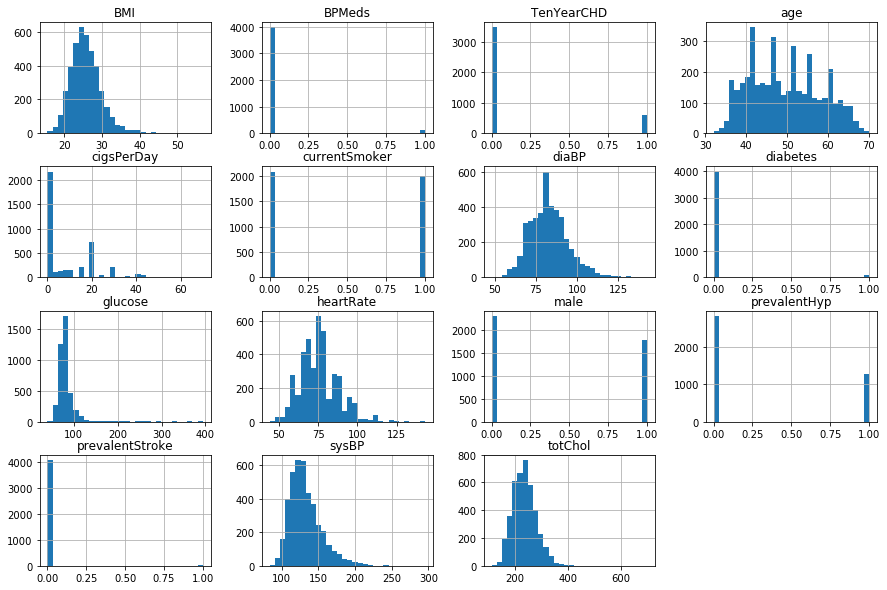

In [9]:
df_train.hist(bins=30, figsize=(15, 10))

# Value Counts of "y column: "TenYearCHD"

In [10]:
dat = df_train["TenYearCHD"].value_counts()
print(dat)

0    3479
1     611
Name: TenYearCHD, dtype: int64


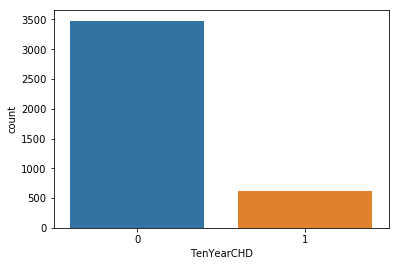

There are 3479 patients without heart disease and 611 patients with the disease


In [11]:
sns.countplot(x='TenYearCHD',data=df_train)
plt.show()
print("There are 3479 patients without heart disease and 611 patients with the disease")

In [12]:
df_train['glucose']

0        77.000000
1        76.000000
2        70.000000
3       103.000000
4        85.000000
           ...    
4234     68.000000
4236     81.963655
4237    107.000000
4238     72.000000
4239     80.000000
Name: glucose, Length: 4090, dtype: float64

# Heatmap to check corelation

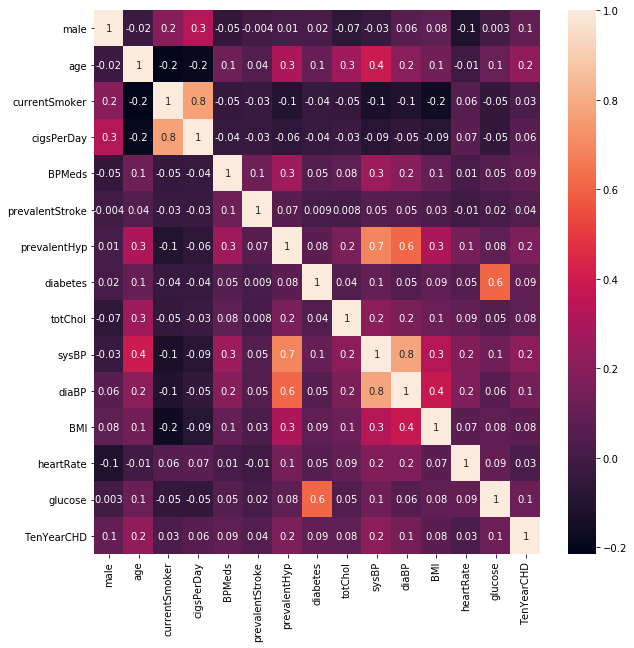

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train.corr(), annot = True, fmt='.1g')

# Feature selection using Boruta
Referred: https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a

In [14]:

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [15]:
#define the features
X = df_train.iloc[:,:-1].values
y = df_train["TenYearCHD"].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2,random_state=1)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2889887C7B8),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2889887C7B8, verbose=2)

In [16]:
# check selected features
feat_selector.support_



array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False])

In [17]:
# check ranking of features
feat_selector.ranking_


array([ 9,  1, 10,  7, 12, 13,  8, 11,  3,  1,  4,  2,  6,  5])

# Most Important features 

In [18]:
df_train.columns[:-1][feat_selector.support_].to_list()

['age', 'sysBP']

In [19]:
data = df_train.columns[:-1][feat_selector.ranking_ <=15].tolist()
data

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [20]:
X = df_train[data]
y = df_train["TenYearCHD"]

# Over sampling for imbalanced dataset


In [21]:
from imblearn.over_sampling import SMOTE


In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

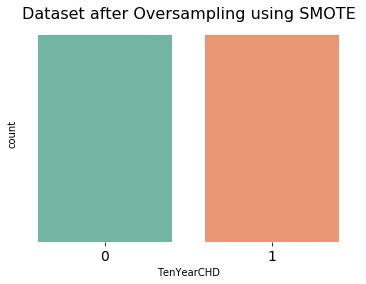

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_sm, y_sm = sm.fit_resample(X, y)
dfxsm = pd.DataFrame (X_sm)
dfysm = pd.DataFrame (y_sm)
dfs=[dfxsm,dfysm]
dfq=pd.concat(dfs, axis=1, join="inner")
sns.countplot(x='TenYearCHD',data=dfq,palette="Set2")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title("Dataset after Oversampling using SMOTE",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.show()
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)


# Classification models

# Decision tree

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.3,random_state =6)
# X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.3,random_state =6)

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Decision Tree")
print('---------------------')
print(classification_report(y_test, y_pred))

Decision Tree
---------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1031
           1       0.78      0.82      0.80      1057

    accuracy                           0.79      2088
   macro avg       0.79      0.79      0.79      2088
weighted avg       0.79      0.79      0.79      2088



# Linear SVC

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.svm import SVC  
model = SVC(kernel='linear', gamma = 6, random_state=0)   # SVC Model
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print('LinearSVC')
print('---------------------')
print(classification_report(y_test, y_pred))
print('')


LinearSVC
---------------------
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1031
           1       0.66      0.70      0.68      1057

    accuracy                           0.66      2088
   macro avg       0.66      0.66      0.66      2088
weighted avg       0.66      0.66      0.66      2088




# Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log = log.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = log.predict(X_test)
print("Logistic regression")
print('---------------------')
print(classification_report(y_test, y_pred))

Logistic regression
---------------------
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1031
           1       0.63      0.62      0.62      1057

    accuracy                           0.62      2088
   macro avg       0.62      0.62      0.62      2088
weighted avg       0.62      0.62      0.62      2088



# SVM

In [28]:
from sklearn import svm
from sklearn.svm import SVC  
model = SVC(kernel='rbf', random_state=0)   # SVC Model
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print('SVM')
print('---------------------')
print(classification_report(y_test, y_pred))
print('')


SVM
---------------------
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1031
           1       0.64      0.68      0.66      1057

    accuracy                           0.65      2088
   macro avg       0.65      0.65      0.64      2088
weighted avg       0.65      0.65      0.65      2088




# Hyper parameter tuning for SVM ,linearSVC

In [29]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0,0.01,0.1,0.8,1,1.2,10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf'] } 
  
grid = GridSearchCV(svm.SVC(random_state=0), param_grid,verbose=1,n_jobs=-1,cv=10)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  1.1min finished


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01, random_state=0)
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1031
           1       0.94      0.93      0.94      1057

    accuracy                           0.94      2088
   macro avg       0.94      0.94      0.94      2088
weighted avg       0.94      0.94      0.94      2088



# Hyper parameter tuning logistic regression

# Hyper parameter tuning Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {"n_estimators":[10,100],
              'criterion':['gini','entropy'],
             'max_depth':[20,60,'None','sqrt'],
             'bootstrap':['True','False']}
random = RandomizedSearchCV(estimator=rf,param_distributions=parameters,verbose=1,n_jobs=-1)
random.fit(X_train,y_train)
random.best_params_,random.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


({'n_estimators': 100,
  'max_depth': 60,
  'criterion': 'gini',
  'bootstrap': 'False'},
 0.866735112936345)

In [32]:
rf = RandomForestClassifier(n_estimators= 90,
 max_depth= 60,
 criterion= 'gini',
 bootstrap= False)
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1031
           1       0.89      0.89      0.89      1057

    accuracy                           0.89      2088
   macro avg       0.89      0.89      0.89      2088
weighted avg       0.89      0.89      0.89      2088

